In [80]:
%reset
%matplotlib inline


import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

import pandas as pd
import matplotlib.pyplot as plt 

from nilearn import plotting 

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [290]:
top_dir = '/home/finc/Dropbox/Projects/LearningBrain/data/neuroimaging/'
out_dir = '/home/finc/Dropbox/Projects/LearningBrain/data/neuroimaging/'

cor_mat = np.load(top_dir + 'LearningBrain_matrices_all_lp_0.08_aCompCor_power.npy')

cor_mat[16, 1, 0, :, :] = 0 # zeroing missing data
cor_mat[34, 1, 0, :, :] = 0

cor_mat.shape

(46, 4, 3, 264, 264)

In [82]:
def upper_tri_masking(A):
    m = A.shape[0]
    r = np.arange(m)
    mask = r[:, None] < r
    return A[mask]

In [ ]:
from scipy import spatial

subs = len(cor_mat[:,0,0,0,0])
sess = len(cor_mat[0,:,0,0,0])
cond = len(cor_mat[0,0,:,0,0])

M = np.zeros((subs * sess * cond, subs * sess * cond))
i = 0
j = 0

for sub in range(subs):
    for ses in range(sess):
        for con in range(cond):
            for subx in range(subs):
                for sesx in range(sess):
                    for conx in range(cond):
                        B = upper_tri_masking(cor_mat[subx, sesx, conx, :, :])
                        similarity = 1 - spatial.distance.cosine(A, B)
                        M[i,j] = similarity
                        while j != (subs * sess * cond)-1 :
                            j += 1
                while j != (subs * sess * cond)-1 :
                    i += 1



#A = upper_tri_masking(cor_mat[10,0,0,:,:])
#B = upper_tri_masking(cor_mat[10,3,0,:,:])

#result = 1 - spatial.distance.cosine(A, B)

#x = cosine_similarity(A,B)
#x.shape
#x

#print(A)
#print(B)
#print("cosine similarity: ", result)


In [144]:
from scipy import spatial

subs = len(cor_mat[:,0,0,0,0])
sess = len(cor_mat[0,:,0,0,0])
cond = len(cor_mat[0,0,:,0,0])

M = np.zeros((subs * sess * cond, subs * sess * cond))
i = 0
j = 0

for sub in range(subs):
    for ses in range(sess):
        for con in range(cond):
            for subx in range(subs):
                for sesx in range(sess):
                    for conx in range(cond):
                        A = upper_tri_masking(cor_mat[sub, ses, con, :, :])
                        B = upper_tri_masking(cor_mat[subx, sesx, conx, :, :])
                        similarity = 1 - spatial.distance.cosine(A, B)
                        M[i,j] = similarity
                        j += 1
            i += 1
            j = 0

/home/finc/anaconda/lib/python3.6/site-packages/scipy/spatial/distance.py:505: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - np.dot(u, v) / (norm(u) * norm(v))


In [291]:
from scipy import spatial

subs = len(cor_mat[:,0,0,0,0])
sess = len(cor_mat[0,:,0,0,0])
cond = len(cor_mat[0,0,:,0,0])

K = np.zeros((subs, sess * cond, sess * cond))

i = 0
j = 0

for sub in range(subs):
    for ses in range(sess):
        for con in range(cond):
            for sesx in range(sess):
                for conx in range(cond):
                    A = upper_tri_masking(cor_mat[sub, ses, con, :, :])
                    B = upper_tri_masking(cor_mat[sub, sesx, conx, :, :])
                    similarity = 1 - spatial.distance.cosine(A, B)
                    K[sub, i, j] = similarity
                    j += 1
            i += 1
            j = 0
    i = 0


/home/finc/anaconda/lib/python3.6/site-packages/scipy/spatial/distance.py:505: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - np.dot(u, v) / (norm(u) * norm(v))


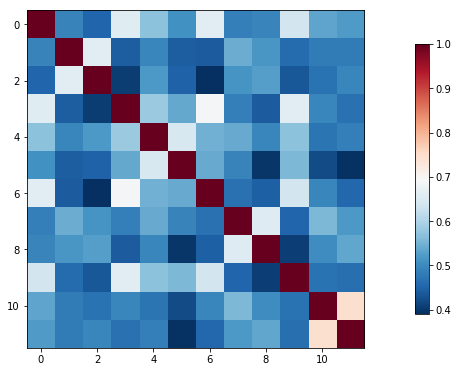

In [207]:
plotting.plot_matrix(K[20,:,:])

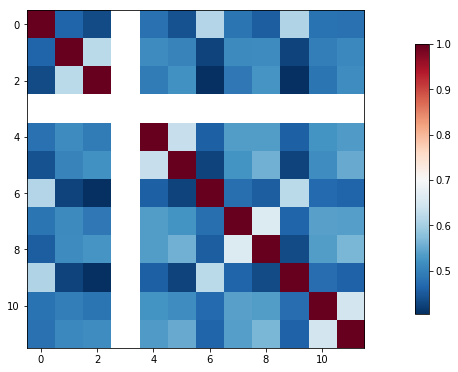

In [211]:
x = K.mean(axis = 0)
x.shape

plotting.plot_matrix(x)

In [292]:
# Creating groups vectors

groups = pd.read_csv('/home/finc/Dropbox/Projects/LearningBrain/github/LearningBrain_networks/data/behavioral/group_assignment.csv')

trained = (groups.group == 'Experimental') | (groups.group == 'Control')
trained_subs = groups[trained]

experimental = (trained_subs == 'Experimental')
control = (trained_subs == 'Control')

exp_vector = experimental['group'].values
con_vector = control['group'].values


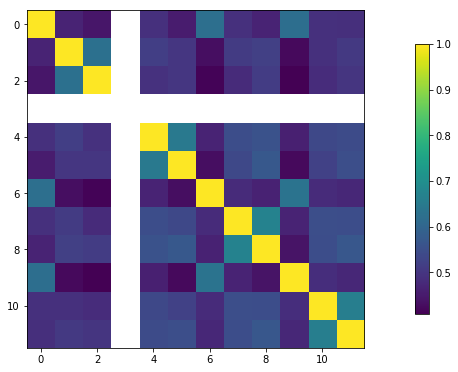

In [293]:
experimental = K[exp_vector,:,:]
control = K[con_vector,:,:]


exp = experimental.mean(axis = 0)
con = control.mean(axis = 0)

plotting.plot_matrix(exp, cmap="viridis")

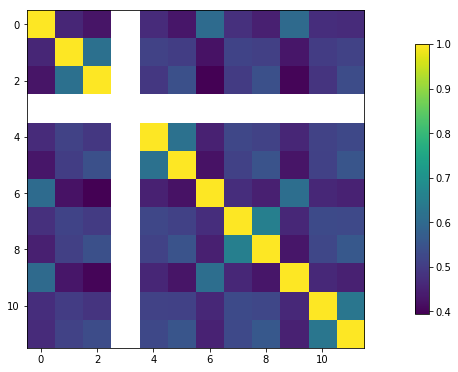

In [294]:
plotting.plot_matrix(con, cmap="viridis")

In [269]:
modules = pd.read_csv('/home/finc/Dropbox/Projects/LearningBrain/code/modules.txt', sep = " ", header = None)

mod = mod[0].values

DMFP = (mod == 'DM')|(mod == 'FP')
DM = (mod == 'DM')
FP = (mod == 'FP')

sum(DMFP)

83

In [276]:
from scipy import spatial

subs = len(cor_mat[:,0,0,0,0])
sess = len(cor_mat[0,:,0,0,0])
cond = len(cor_mat[0,0,:,0,0])

K = np.zeros((subs, sess * cond, sess * cond))
cor_mat = cor_mat[:,:,:,:,DMFP]
cor_mat = cor_mat[:,:,:,DMFP,:]



In [277]:
K = np.zeros((subs, sess * cond, sess * cond))

i = 0
j = 0

for sub in range(subs):
    for ses in range(sess):
        for con in range(cond):
            for sesx in range(sess):
                for conx in range(cond):
                    A = upper_tri_masking(cor_mat[sub, ses, con, :, :])
                    B = upper_tri_masking(cor_mat[sub, sesx, conx, :, :])
                    similarity = 1 - spatial.distance.cosine(A, B)
                    K[sub, i, j] = similarity
                    j += 1
            i += 1
            j = 0
    i = 0


/home/finc/anaconda/lib/python3.6/site-packages/scipy/spatial/distance.py:505: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - np.dot(u, v) / (norm(u) * norm(v))


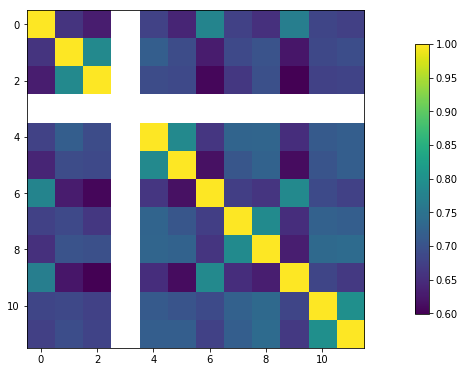

In [289]:
experimental = K[exp_vector,:,:]
control = K[con_vector,:,:]


exp = experimental.mean(axis = 0)
con = control.mean(axis = 0)

plotting.plot_matrix(exp, cmap="viridis")

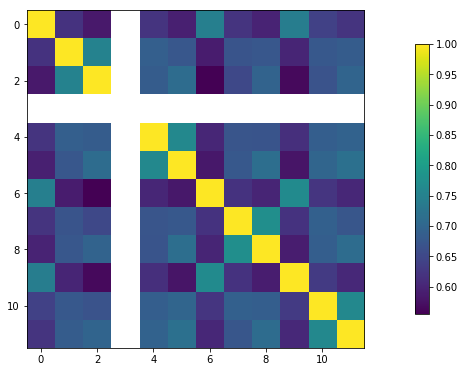

In [288]:
plotting.plot_matrix(con, cmap="viridis")